In [15]:
import cv2
import tensorflow as tf
from os import path
import os
import random
from matplotlib import pyplot as plt
from model import make_model

In [16]:
checkpoint_path="checkpoints\\chk1\\chk1"

In [17]:
model = make_model((50,50,3))

In [18]:
model.load_weights(checkpoint_path)

In [19]:
datasetPath = "lettersDataset_final"

In [20]:
labels = [f.name for f in os.scandir(path.join(datasetPath, "train")) if f.is_dir()]

In [224]:
# inputCaptchaPath = "dataset\\caixa\\1luka.gif"
folder = "lettersDataset_final\\test\\n\\"
inputCaptchaPath = path.join(folder, random.choice(os.listdir(folder)))

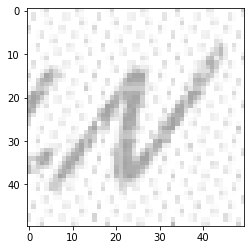

In [225]:
image = cv2.imread(inputCaptchaPath)
image = cv2.resize(image, (50,50))
plt.imshow(image)

In [226]:
image.shape

(50, 50, 3)

In [227]:
image = image.reshape(-1, 50, 50, 3)

In [228]:
image.shape

(1, 50, 50, 3)

In [229]:
prediction = model.predict(image)
labeledPredictions = [a for a in zip(labels, prediction[0])]

In [230]:
print(max(labeledPredictions, key=lambda x: x[1]))

('n', 0.99423015)
